Data simulation 

In [668]:
import numpy as np
import scanpy as sc 
import  seaborn as sns
import pandas as pd

In [669]:
def sample(n_conditions,xmus,xsds,ymus,ysds,prop,n_cells,n_genes,proj_mtx):
    comp = np.random.choice(np.arange(n_conditions),p=prop, size = n_cells)
    x = np.random.normal(loc=xmus[comp], scale=xsds[comp]).reshape(-1,1)
    y = np.random.normal(loc=ymus[comp], scale=ysds[comp]).reshape(-1,1)
    sample = np.concatenate([x,y],axis =1)
    proj = np.random.normal(size=n_genes*n_cells).reshape((-1,2))[:n_genes,:]
    sample = np.dot(sample, proj_mtx.T)
    conditions = pd.Categorical(comp)
    adata = sc.AnnData(X=sample)
    adata.obs["labels"] = conditions[comp]
    return adata,comp

First cell-type

In [920]:
x_mean = np.array([7,7,7])
x_std = np.array([1,1,1])
y_mean = np.array([1,7,13])
y_std = np.array([1,1,1])
ncells = 4000
ngenes = 4000
prob = np.array([0.3,0.4,0.3])
cond = 3
proj = np.random.normal(size=ncells*ngenes).reshape((-1,2))[:ngenes,:]

In [921]:
adata, p  = sample(cond,x_mean,x_std,y_mean,y_std,prob,ncells,ngenes,proj)
adata.obs["cell_type"] = ["A"]*len(adata)

In [922]:
adata.obs["labels"].value_counts()

0    1590
2    1206
1    1204
Name: labels, dtype: int64

... storing 'cell_type' as categorical


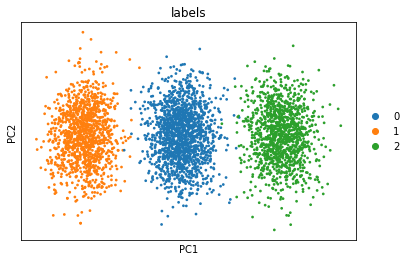

In [923]:
sc.tl.pca(adata)
sc.pl.pca(adata, color="labels")

In [974]:
adata.obs["labels"].cat.categories

Int64Index([0, 1, 2], dtype='int64')

In [975]:
adata.rename_categories("labels",[1, 0, 2])

generating second cell type 

In [963]:
x_mean = np.array([0,0,0])
x_std = np.array([1,1,1])
y_mean = np.array([1,7,13])
y_std = np.array([1,1,1])
ncells = 4000
ngenes = 4000
prob = np.array([0.3,0.4,0.3])
cond = 3

In [964]:
adata_ct2,_ = sample(cond,x_mean,x_std,y_mean,y_std,prob,ncells,ngenes,proj)
adata_ct2.obs["cell_type"] = ["B"]*len(adata_ct2)

In [965]:
adata_ct2.obs["labels"].value_counts()

1    1579
2    1211
0    1210
Name: labels, dtype: int64

... storing 'cell_type' as categorical


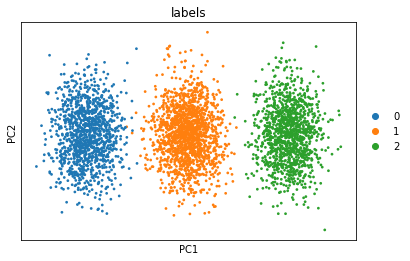

In [966]:
sc.tl.pca(adata_ct2)
sc.pl.pca(adata_ct2, color="labels")

In [967]:
adata.obs["labels"].value_counts()

0    1590
2    1206
1    1204
Name: labels, dtype: int64

generating full data set 

In [976]:
adata_all = adata_ct2.concatenate(adata)
adata_all.obs["labels"] =  pd.Categorical(adata_all.obs["labels"] )

... storing 'cell_type' as categorical


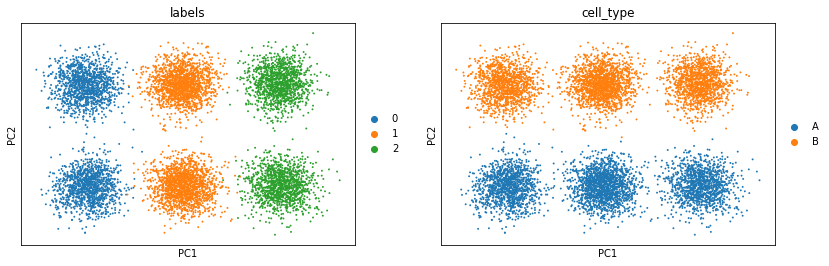

In [977]:
sc.tl.pca(adata_all)
sc.pl.pca(adata_all, color=["labels", "cell_type"])

In [978]:
sc.pp.neighbors(adata_all)
sc.tl.umap(adata_all)

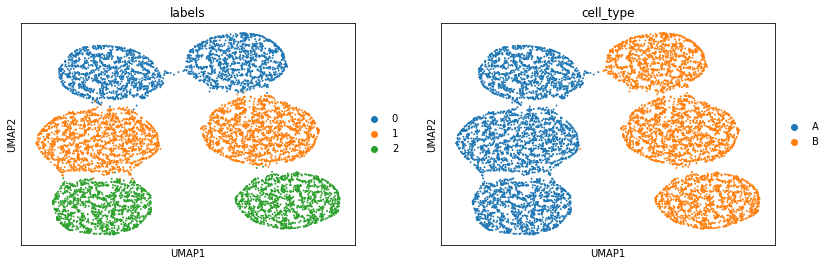

In [979]:
sc.pl.umap(adata_all,color=["labels", "cell_type"])

In [980]:
adata.write("simulated.h5ad")